In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import plotly.graph_objects as go
import backtesting
from backtesting import Backtest, Strategy
from backtesting.lib import crossover, plot_heatmaps
from bokeh.plotting import output_notebook, show

from IPython.display import display
from dataclasses import dataclass, asdict
from typing import List, Annotated

from research_utils import plot_commodity, read_csv_imc, convert_to_candle

c:\Users\YashS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
df_2 = read_csv_imc(r"..\data\prices_round_2_day_1.csv")
df_1 = read_csv_imc(r"..\data\prices_round_2_day_0.csv")
df = read_csv_imc(r"..\data\prices_round_2_day_-1.csv")

In [24]:
df.shape

(10001, 8)

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

X = df[["HUMIDITY", "SUNLIGHT", "TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF"]].to_numpy()
X = np.append(X, df_1[["HUMIDITY", "SUNLIGHT", "TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF"]].to_numpy(), axis=0)
X = np.append(X, df_2[["HUMIDITY", "SUNLIGHT", "TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF"]].to_numpy(), axis=0)
X[0] = X[0] - 70
X[1] = X[1] - 2777
Y = df["ORCHIDS"].to_numpy().reshape(-1, 1)
Y = np.append(Y, df_1["ORCHIDS"].to_numpy().reshape(-1, 1), axis=0)
Y = np.append(Y, df_2["ORCHIDS"].to_numpy().reshape(-1, 1), axis=0)

print(X.shape)
print(Y.shape)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, Y)

# Coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Now you can use the model to predict prices
# For prediction, you'll need to prepare the new data in the same way as your training data

(30003, 5)
(30003, 1)
Coefficients: [[  3.96318521   0.03370547 -22.5435653    5.45653156  13.06187447]]
Intercept: [715.91297276]


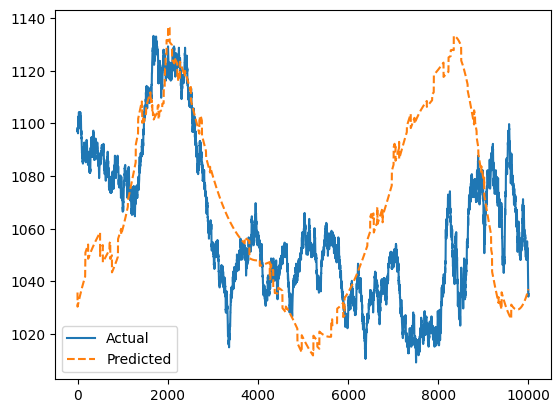

In [34]:
# plot the orchids prices using df['ORCHIDS']
import matplotlib.pyplot as plt

plt.plot(df_2['ORCHIDS'])
X_0  = df_2[["HUMIDITY", "SUNLIGHT", "TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF"]].to_numpy()
plt.plot(model.predict(X_0), linestyle='dashed')
plt.legend(['Actual', 'Predicted'])
plt.show()



